In [92]:
import pandas as pd
import duckdb
from constants import GRAY_1, GRAY_2, GRAY_3, BLUE_1


df = pd.read_csv("data/norway_new_car_sales_by_make.csv")

df

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5
...,...,...,...,...,...
4372,2017,1,Nilsson,3,0.0
4373,2017,1,Maserati,2,0.0
4374,2017,1,Ferrari,1,0.0
4375,2017,1,Smart,1,0.0


In [93]:
df_quantity_brand = duckdb.query(
    """
             SELECT make AS Brand, SUM(quantity) as Quantity 
             FROM df 
             GROUP BY make 
             ORDER BY quantity DESC"""
).df().set_index("Brand")

df_quantity_brand.head()

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0


Bar charts

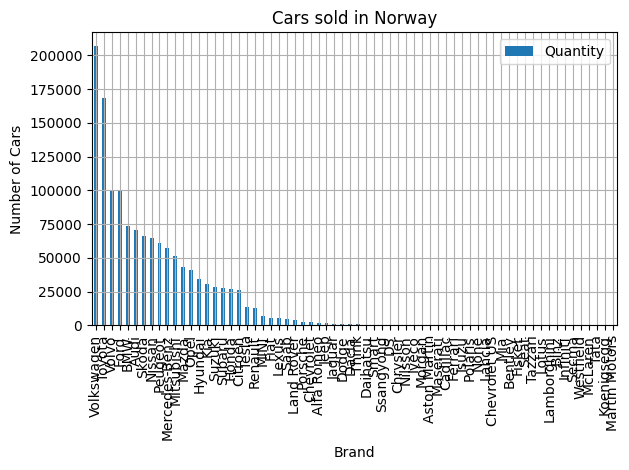

In [94]:
ax = df_quantity_brand.plot(kind = "bar", title = "Cars sold in Norway", ylabel = "Number of Cars")
ax.grid()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/0_bar_inital.png")

In [95]:
df_quantity_brand.iloc[:10]

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
Audi,70475.0
Skoda,66007.0
Nissan,64535.0
Peugeot,61033.0


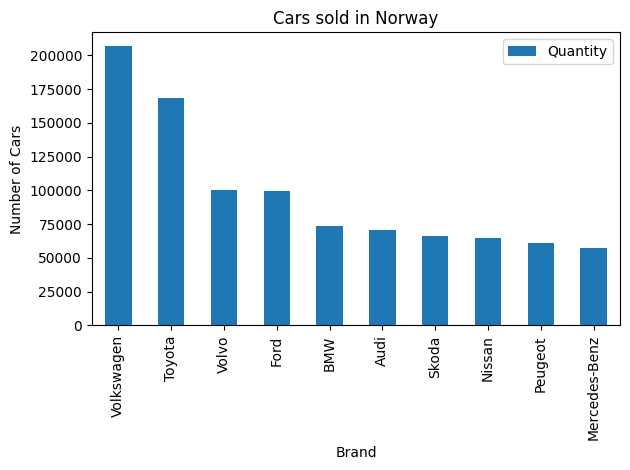

In [96]:
ax = df_quantity_brand.iloc[:10].plot(kind = "bar", title = "Cars sold in Norway", ylabel = "Number of Cars")
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/0_bar_inital.png")

## Apply data storytelling

- Remove clutter
- Contrast
- Colors sparingly
- Descriptive title
- Proximity principle with annotations
- Percentage insteda of absolute values
- Horizontal bar

In [97]:
# Percentage

df_percentage = df_quantity_brand["Quantity"] / df_quantity_brand["Quantity"].sum() * 100

df_percentage.sum()

np.float64(100.00000000000001)

In [98]:

df_percentage_top10 = df_percentage.iloc[:10]

colors = [GRAY_1]*len(df_percentage_top10)
colors[2] = BLUE_1
colors



['#CCCCCC',
 '#CCCCCC',
 '#1E4E5C',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC']

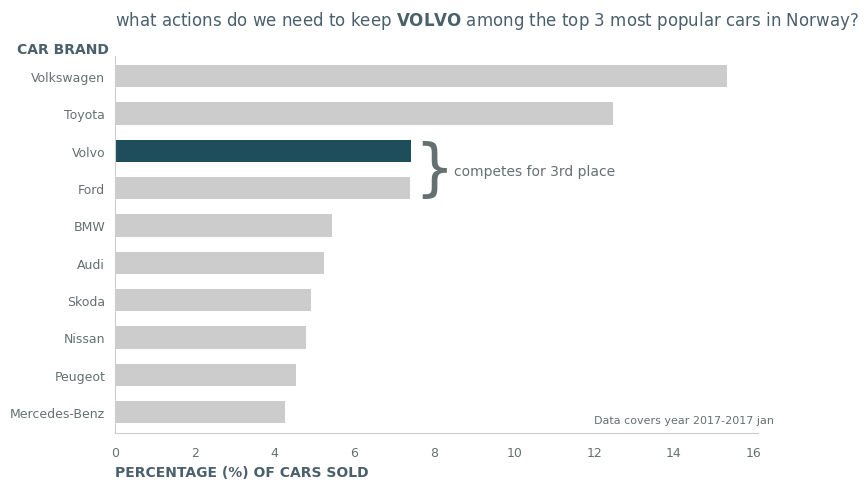

In [153]:
# Horizontal barchart

ax = df_percentage.iloc[:10].plot(
kind = "barh", 
ylabel = "Number of Cars", 
figsize=(8, 5), 
width = .6,
color = colors

)
ax.invert_yaxis() # Vänder upp och ned

# Remove clutter
ax.spines[["top", "right"]].set_visible(False) # Tar bor övre och höger kantlinje

# Contrasts
ax.spines[["left", "bottom"]].set_color(GRAY_1) # Sätter färgen på vä och nedre kantlinje
ax.tick_params(axis="both", colors = GRAY_2, labelsize = 9, length = 0, pad = 10)
ax.tick_params(axis="y", pad=7) # Hur nära y axens värden

# Descriptive title and labels - call to action (CTA)
ax.set_title(
    "what actions do we need to keep"
    + r" $\bf{VOLVO}$" # lateshmode
    + " among the top 3 most popular cars in Norway?",
    loc="left", # vart rubriken hamnar
    color=GRAY_3,
    pad = 22, # Hur långt från rubrik och grafen
)

ax.set_xlabel("PERCENTAGE (%) OF CARS SOLD", color = GRAY_3, fontweight = "bold", loc = "left")
ax.set_ylabel("CAR BRAND", color = GRAY_3, fontweight = "bold", rotation = 0)
ax.yaxis.set_label_coords(-0.08,1)

# Annotations - proximity principlefam
ax.annotate(xy = (7.5, 2.97), text ="}", fontsize=45, color=GRAY_2,)
ax.annotate(xy = (8.5, 2.65), text="competes for 3rd place", fontsize=10, color=GRAY_2,)
ax.annotate(xy = (12, 9.3), text ="Data covers year 2017-2017 jan", fontsize=8, color =GRAY_2,)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/0_bar_inital.png")

